             antecedents            consequents  antecedent support  \
0                 (Eggs)                (Onion)                 0.8   
1                (Onion)                 (Eggs)                 0.6   
2   (Eggs, Kidney Beans)                (Onion)                 0.8   
3  (Onion, Kidney Beans)                 (Eggs)                 0.6   
4                 (Eggs)  (Onion, Kidney Beans)                 0.8   
5                (Onion)   (Eggs, Kidney Beans)                 0.6   

   consequent support  support  confidence  lift  leverage  conviction  \
0                 0.6      0.6        0.75  1.25      0.12         1.6   
1                 0.8      0.6        1.00  1.25      0.12         inf   
2                 0.6      0.6        0.75  1.25      0.12         1.6   
3                 0.8      0.6        1.00  1.25      0.12         inf   
4                 0.6      0.6        0.75  1.25      0.12         1.6   
5                 0.8      0.6        1.00  1.25      0.12

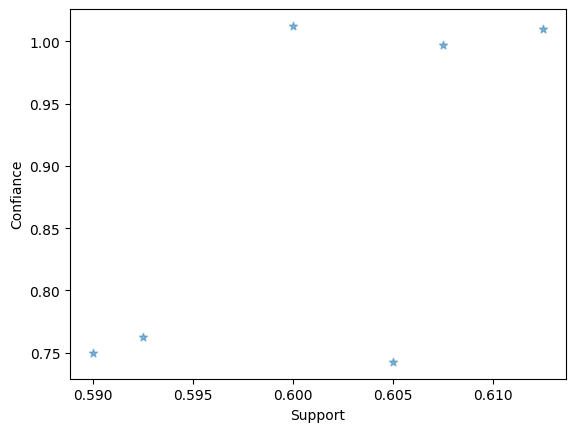

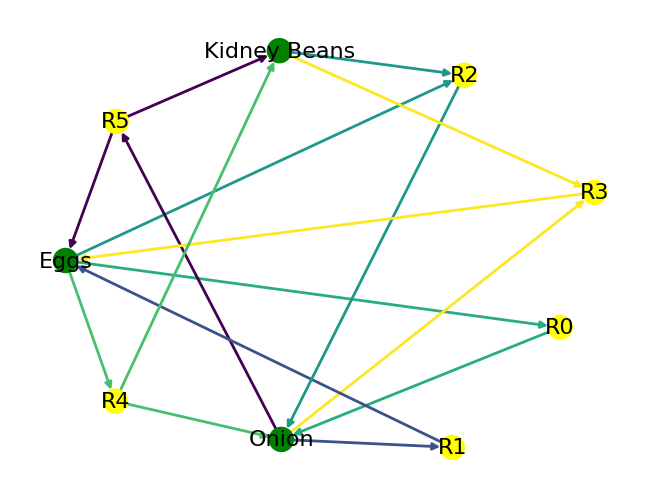

In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns

# Préparation des données
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

# Transformation en One-Hot Encoding
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Utilisation de l'algorithme Apriori
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Génération des règles d'association
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Affichage des règles
print(rules)

# Visualisation de la confiance et du support
support = rules['support'].values
confidence = rules['confidence'].values

for i in range(len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1, 10) - 5)
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1, 10) - 5)

plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('Support')
plt.ylabel('Confiance')
plt.show()

# Fonction pour la visualisation avec NetworkX
def draw_graph(rules, rules_to_show):
    G = nx.DiGraph()
    color_map = []
    N = 50
    colors = np.random.rand(N)
    
    for i in range(rules_to_show):
        G.add_nodes_from(["R" + str(i)])

        for a in rules.iloc[i]['antecedents']:
            G.add_nodes_from([a])
            G.add_edge(a, "R" + str(i), color=colors[i], weight=2)

        for c in rules.iloc[i]['consequents']:
            G.add_nodes_from([c])
            G.add_edge("R" + str(i), c, color=colors[i], weight=2)

    for node in G:
        if str(node).startswith('R'):
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G.edges()
    edge_colors = [G[u][v]['color'] for u, v in edges]
    edge_weights = [G[u][v]['weight'] for u, v in edges]

    pos = nx.spring_layout(G, k=16, scale=1)
    nx.draw(G, pos, node_color=color_map, edge_color=edge_colors, width=edge_weights, with_labels=True, font_size=16)

    plt.show()

# Dessiner le graphe pour les règles
draw_graph(rules, 6)  # Modifier le 6 pour le nombre de règles à afficher
